In [1]:
#KEMBOI PROJECT
#Title:ML Chatbot using the MIND Dataset
#Title: Research Project
#Student Name: Mathew Kiplagat Kemboi
#Date: 11.07.2025


In [2]:
#These are the main libraries that will be used in the project but others will be added as the project progresses
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

In [4]:
#Loading data in Colab
#MIND-small will be used because its manageable,but scaling will be done once the first phase of the project is running smoothly
import pandas as pd

# Load behaviors.tsv (simulate path as needed)
behaviors = pd.read_csv("behaviors.tsv", sep="\t", header=None)

# Show first few rows to understand structure
print(behaviors.head())


   0       1                      2  \
0  1  U13740  11/11/2019 9:05:58 AM   
1  2  U91836  11/12/2019 6:11:30 PM   
2  3  U73700  11/14/2019 7:01:48 AM   
3  4  U34670  11/11/2019 5:28:05 AM   
4  5   U8125  11/12/2019 4:11:21 PM   

                                                   3  \
0  N55189 N42782 N34694 N45794 N18445 N63302 N104...   
1  N31739 N6072 N63045 N23979 N35656 N43353 N8129...   
2  N10732 N25792 N7563 N21087 N41087 N5445 N60384...   
3  N45729 N2203 N871 N53880 N41375 N43142 N33013 ...   
4                        N10078 N56514 N14904 N33740   

                                                   4  
0                                  N55689-1 N35729-0  
1  N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...  
2  N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...  
3                N35729-0 N33632-0 N49685-1 N27581-0  
4  N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...  


In [5]:

# Assign proper column names
behaviors.columns = ['impression_id', 'user_id', 'timestamp', 'history', 'impressions']

# Preview
print(behaviors.head())

   impression_id user_id              timestamp  \
0              1  U13740  11/11/2019 9:05:58 AM   
1              2  U91836  11/12/2019 6:11:30 PM   
2              3  U73700  11/14/2019 7:01:48 AM   
3              4  U34670  11/11/2019 5:28:05 AM   
4              5   U8125  11/12/2019 4:11:21 PM   

                                             history  \
0  N55189 N42782 N34694 N45794 N18445 N63302 N104...   
1  N31739 N6072 N63045 N23979 N35656 N43353 N8129...   
2  N10732 N25792 N7563 N21087 N41087 N5445 N60384...   
3  N45729 N2203 N871 N53880 N41375 N43142 N33013 ...   
4                        N10078 N56514 N14904 N33740   

                                         impressions  
0                                  N55689-1 N35729-0  
1  N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...  
2  N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...  
3                N35729-0 N33632-0 N49685-1 N27581-0  
4  N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...  


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
print("Behaviors data sample:")
print(behaviors.head())

Behaviors data sample:
   impression_id user_id              timestamp  \
0              1  U13740  11/11/2019 9:05:58 AM   
1              2  U91836  11/12/2019 6:11:30 PM   
2              3  U73700  11/14/2019 7:01:48 AM   
3              4  U34670  11/11/2019 5:28:05 AM   
4              5   U8125  11/12/2019 4:11:21 PM   

                                             history  \
0  N55189 N42782 N34694 N45794 N18445 N63302 N104...   
1  N31739 N6072 N63045 N23979 N35656 N43353 N8129...   
2  N10732 N25792 N7563 N21087 N41087 N5445 N60384...   
3  N45729 N2203 N871 N53880 N41375 N43142 N33013 ...   
4                        N10078 N56514 N14904 N33740   

                                         impressions  
0                                  N55689-1 N35729-0  
1  N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...  
2  N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...  
3                N35729-0 N33632-0 N49685-1 N27581-0  
4  N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...  


In [8]:
print(behaviors.columns)


Index(['impression_id', 'user_id', 'timestamp', 'history', 'impressions'], dtype='object')


In [11]:
def preprocess_behaviors(df):
    rows = []
    for _, row in df.iterrows():
        user = row['user_id']
        timestamp = row['timestamp']
        impressions_raw = row.get('impressions', '')

        # Skip rows where impressions are missing or invalid
        if not isinstance(impressions_raw, str):
            continue

        impressions = impressions_raw.split()
        for imp in impressions:
            try:
                news_id, clicked = imp.split('-')
                rows.append({
                    'UserID': user,
                    'Timestamp': timestamp,
                    'NewsID': news_id,
                    'Clicked': int(clicked)
                })
            except ValueError:
                continue  # Skip malformed entries
    return pd.DataFrame(rows)

# Run the function
behaviors_long = preprocess_behaviors(behaviors)

# Preview processed data
print(behaviors_long.head())


   UserID              Timestamp  NewsID  Clicked
0  U13740  11/11/2019 9:05:58 AM  N55689        1
1  U13740  11/11/2019 9:05:58 AM  N35729        0
2  U91836  11/12/2019 6:11:30 PM  N20678        0
3  U91836  11/12/2019 6:11:30 PM  N39317        0
4  U91836  11/12/2019 6:11:30 PM  N58114        0


In [12]:
# Load and Explore news.tsv
news = pd.read_csv("news.tsv", sep='\t', header=None)

# Assign meaningful column names based on MIND dataset format
news.columns = [
    'NewsID', 'Category', 'SubCategory', 'Title', 'Abstract',
    'URL', 'TitleEntities', 'AbstractEntities'
]

# Show first few rows
news.head()


,NewsID,Category,SubCategory,Title,Abstract,URL,TitleEntities,AbstractEntities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [13]:
#Merge behaviors_long with news
# Merge the click behavior with news metadata on NewsID
merged_df = pd.merge(behaviors_long, news, on='NewsID', how='left')

# Preview the merged dataset
merged_df.head()


,UserID,Timestamp,NewsID,Clicked,Category,SubCategory,Title,Abstract,URL,TitleEntities,AbstractEntities
0,U13740,11/11/2019 9:05:58 AM,N55689,1,sports,football_nfl,"Charles Rogers, former Michigan State football...","Charles Rogers, the former Michigan State foot...",https://assets.msn.com/labs/mind/BBWAPO6.html,"[{""Label"": ""Charles Rogers (American football)...","[{""Label"": ""2003 NFL Draft"", ""Type"": ""U"", ""Wik..."
1,U13740,11/11/2019 9:05:58 AM,N35729,0,news,newsus,Porsche launches into second story of New Jers...,The Porsche went airborne off a median in Toms...,https://assets.msn.com/labs/mind/BBWyjM9.html,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId..."
2,U91836,11/12/2019 6:11:30 PM,N20678,0,sports,more_sports,Bode Miller delivered his twin boys after midw...,Bode Miller added yet another impressive title...,https://assets.msn.com/labs/mind/BBWERWB.html,"[{""Label"": ""Bode Miller"", ""Type"": ""P"", ""Wikida...","[{""Label"": ""Bode Miller"", ""Type"": ""P"", ""Wikida..."
3,U91836,11/12/2019 6:11:30 PM,N39317,0,news,newspolitics,"Senior Trump official embellished résumé, had ...",State Dept. official Mina Chang claimed to be ...,https://assets.msn.com/labs/mind/BBWEmIj.html,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Harvard Business School"", ""Type"": ..."
4,U91836,11/12/2019 6:11:30 PM,N58114,0,autos,autosnews,2020 Ford Explorer launch hardly went accordin...,NaN,https://assets.msn.com/labs/mind/BBWEGnz.html,"[{""Label"": ""Ford Explorer"", ""Type"": ""V"", ""Wiki...",[]


In [14]:


# View first few rows
behaviors.head()


,impression_id,user_id,timestamp,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


In [17]:
# Expand impressions into click labels safely
def explode_impressions(row):
    impressions = row.get('impressions', '')

    # Skip if impressions is NaN or not a string
    if not isinstance(impressions, str) or impressions.strip() == '':
        return []

    items = impressions.split()
    exploded_rows = []

    for i in items:
        try:
            news_id, clicked = i.split('-')
            exploded_rows.append((row['user_id'], news_id, int(clicked)))
        except ValueError:
            continue  # Skip malformed entries

    return exploded_rows

# Apply the function
exploded = behaviors.apply(explode_impressions, axis=1)

# Flatten the list of lists
click_data = pd.DataFrame(
    [item for sublist in exploded for item in sublist],
    columns=['UserID', 'NewsID', 'Clicked']
)

# Merge with news data
click_news = pd.merge(click_data, news[['NewsID', 'Category']], on='NewsID', how='left')

# Group by Category and Click
click_summary = click_news.groupby(['Category', 'Clicked']).size().unstack(fill_value=0)
click_summary['Click_Rate (%)'] = 100 * click_summary[1] / (click_summary[0] + click_summary[1])

click_summary


Clicked,0,1,Click_Rate (%)
Category,,,
autos,48483,1409,2.824100
entertainment,61522,1908,3.008040
finance,98838,3735,3.641309
foodanddrink,65573,2015,2.981298
health,53229,1896,3.439456
kids,19,0,0.000000
lifestyle,114517,4805,4.026919
movies,23516,728,3.002805
music,46143,2966,6.039626


In [18]:
#Extract Text Features from Title/Abstract
from sklearn.feature_extraction.text import TfidfVectorizer

# Join with Title
merged = pd.merge(click_data, news[['NewsID', 'Title']], on='NewsID', how='left')

# Fill NaNs
merged['Title'] = merged['Title'].fillna("")

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=300)
X_tfidf = vectorizer.fit_transform(merged['Title'])

# Target
y = merged['Clicked']


In [19]:
# Train Classification Models
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.9584969338166324
AUC: 0.6509837238315996


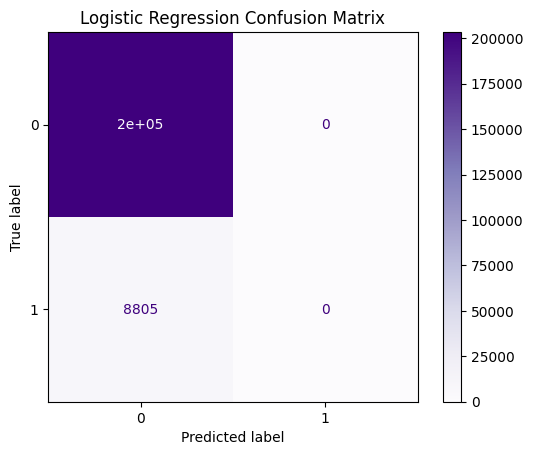

In [20]:
#Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Purples")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


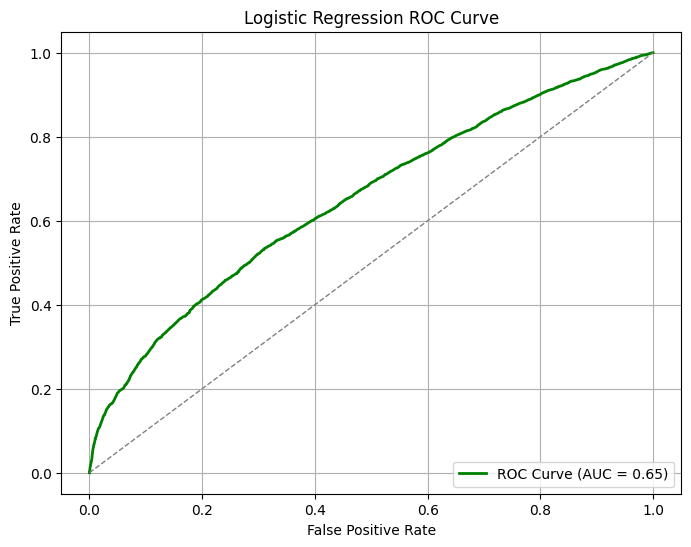

In [21]:
#ROC Curve for Logistic Regression
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


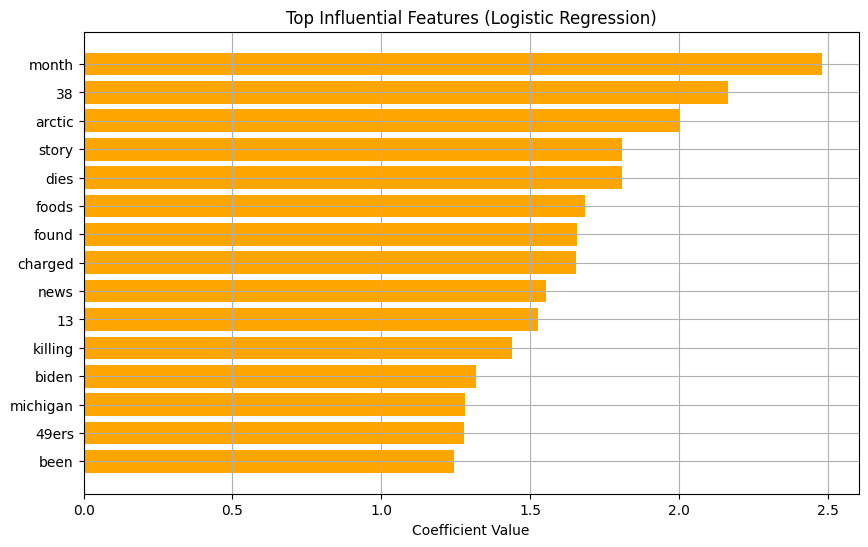

      Feature  Coefficient
167     month     2.478546
13         38     2.165319
29     arctic     2.001495
242     story     1.807646
75       dies     1.807009
93      foods     1.682511
98      found     1.655949
56    charged     1.652100
176      news     1.553973
6          13     1.526183
143   killing     1.438969
41      biden     1.316658
161  michigan     1.282366
15      49ers     1.276992
37       been     1.243184


In [22]:
#Logistic Regression Coefficients (Feature Importance)
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=300)
X_tfidf = tfidf.fit_transform(merged['Title'])

# Target
y = merged['Clicked']
# Extract feature names from the vectorizer (not from the matrix)
feature_names = tfidf.get_feature_names_out()
coefficients = logreg.coef_[0]

# Combine and sort
import numpy as np
import pandas as pd
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=np.abs, ascending=False)

# Top 15 influential words
top_features = coef_df.head(15)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='orange')
plt.title('Top Influential Features (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

print(top_features)



In [23]:
#XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')  # Removed use_label_encoder
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost AUC:", roc_auc_score(y_test, xgb_proba))



XGBoost Accuracy: 0.9584969338166324
XGBoost AUC: 0.6979578985768022


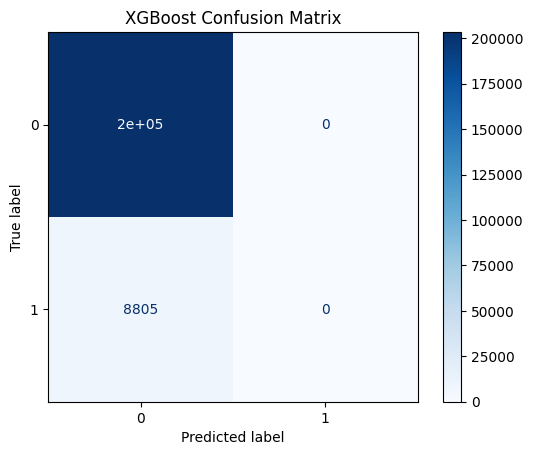

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.show()


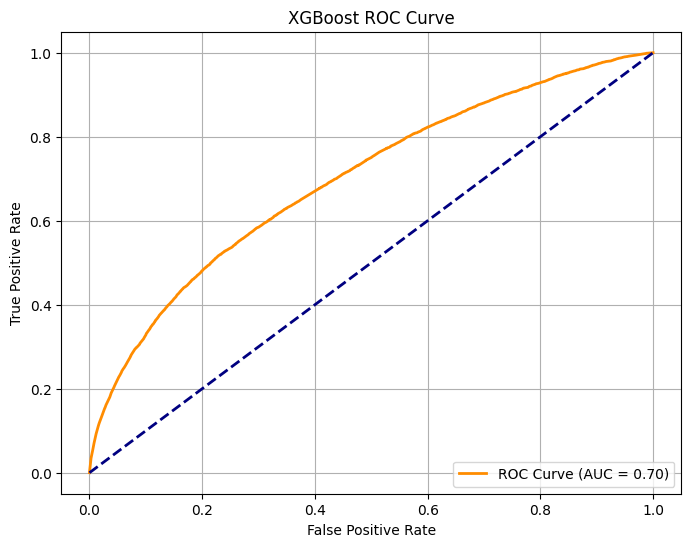

In [25]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, xgb_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


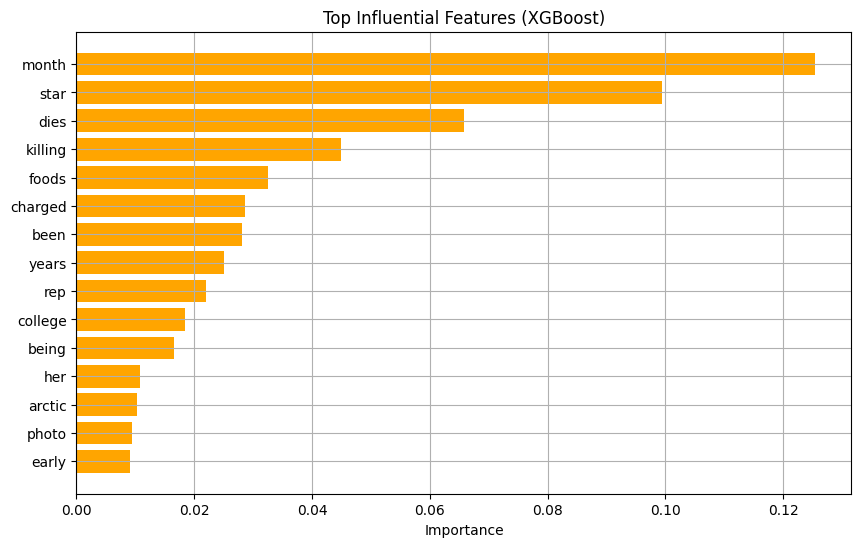

     Feature  Importance
167    month    0.125358
237     star    0.099371
75      dies    0.065885
143  killing    0.044957
93     foods    0.032520
56   charged    0.028663
37      been    0.028153
296    years    0.024978
211      rep    0.021952
64   college    0.018454
39     being    0.016501
117      her    0.010790
29    arctic    0.010350
195    photo    0.009452
82     early    0.009034


In [26]:
#XGBoost Feature Importance (with TF-IDF)
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=300)
X_tfidf = tfidf.fit_transform(merged['Title'])

# Target
y = merged['Clicked']
# Get feature importance scores
feature_importances = xgb.feature_importances_

# Combine and sort
import numpy as np
import pandas as pd
coef_df = pd.DataFrame({
    'Feature': tfidf.get_feature_names_out(),
    'Importance': feature_importances
}).sort_values(by='Importance', key=np.abs, ascending=False)
# Show top 15
top_features = coef_df.head(15)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='orange')
plt.title('Top Influential Features (XGBoost)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()
print(top_features)



In [29]:
click_df.info()
click_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060763 entries, 0 to 1060762
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   UserID   1060763 non-null  object
 1   NewsID   1060763 non-null  object
 2   Clicked  1060763 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 24.3+ MB


,UserID,NewsID,Clicked
0,U13740,N55689,1
1,U13740,N35729,0
2,U91836,N20678,0
3,U91836,N39317,0
4,U91836,N58114,0


In [30]:
news.head()
news.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 51282 entries, ('N55528', 'lifestyle', 'lifestyleroyals') to ('N44276', 'autos', 'autossports')
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NewsID       51282 non-null  object
 1   Category     48616 non-null  object
 2   SubCategory  51282 non-null  object
 3   Title        51279 non-null  object
 4   Abstract     51278 non-null  object
dtypes: object(5)
memory usage: 4.7+ MB


In [ ]:
print(merged.shape)
print(merged[['Category', 'Clicked']].dropna().head())
print(merged['Category'].unique())
print(merged['Clicked'].unique())


(5843444, 4)
Empty DataFrame
Columns: [Category, Clicked]
Index: []
[nan]
[1 0]


In [32]:
print(click_df['NewsID'].head())
print(news['NewsID'].head())
print(click_df['NewsID'].dtype, news['NewsID'].dtype)


0    N55689
1    N35729
2    N20678
3    N39317
4    N58114
Name: NewsID, dtype: object
0    The Brands Queen Elizabeth, Prince Charles, an...
1                        50 Worst Habits For Belly Fat
2    The Cost of Trump's Aid Freeze in the Trenches...
3    I Was An NBA Wife. Here's How It Affected My M...
4    How to Get Rid of Skin Tags, According to a De...
Name: NewsID, dtype: object
object object


In [33]:
#Assign All 8 Column Names
news = pd.read_csv("news.tsv", sep='\t', header=None)
news.columns = ['NewsID', 'Category', 'Subcategory', 'Title', 'Abstract', 'URL', 'Publisher', 'PublishTime']



In [34]:
#Check
print(news[['NewsID', 'Category', 'Title']].head())


   NewsID   Category                                              Title
0  N55528  lifestyle  The Brands Queen Elizabeth, Prince Charles, an...
1  N19639     health                      50 Worst Habits For Belly Fat
2  N61837       news  The Cost of Trump's Aid Freeze in the Trenches...
3  N53526     health  I Was An NBA Wife. Here's How It Affected My M...
4  N38324     health  How to Get Rid of Skin Tags, According to a De...


In [35]:
# Clean and merge
click_df['NewsID'] = click_df['NewsID'].astype(str).str.strip()
news['NewsID'] = news['NewsID'].astype(str).str.strip()

merged = pd.merge(click_df, news[['NewsID', 'Category']], on='NewsID', how='left')
merged_clean = merged.dropna(subset=['Category', 'Clicked'])

# Chi-square analysis
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(merged_clean['Category'], merged_clean['Clicked'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)


Chi-Square Statistic: 2325.4405687908943
Degrees of Freedom: 15
P-value: 0.0


In [36]:
import decimal
from scipy.stats import chi2_contingency

# Set higher precision for decimals
decimal.getcontext().prec = 50

# Run Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Use decimal module for high precision
p_full = decimal.Decimal(p)

print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p_full)


Chi-Square Statistic: 2325.4405687908943
Degrees of Freedom: 15
P-value: 0


In [37]:
import gradio as gr

def predict_click(text):
    vec = vectorizer.transform([text])
    pred = xgb.predict(vec)
    return "Will Click" if pred[0] == 1 else "Will Not Click"

interface = gr.Interface(fn=predict_click, inputs="text", outputs="text")
interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://638eaed2345c28a001.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [38]:
import joblib

# During training (save these)
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(xgb, "xgb_model.pkl")

# During inference (in Gradio)
vectorizer = joblib.load("tfidf_vectorizer.pkl")
xgb = joblib.load("xgb_model.pkl")


In [39]:
text = "Lose 10 pounds in 5 days with this secret"
vec = vectorizer.transform([text])
pred = xgb.predict(vec)
print("Prediction:", pred)


Prediction: [0]


In [40]:
import numpy as np

print(np.unique(y_train, return_counts=True))


(array([0, 1]), array([814315,  34295]))


In [41]:
weight = 4485601 / 189154  # ≈ 23.71


In [42]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    scale_pos_weight=23.71,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:14:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [43]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)


In [44]:
xgb.fit(X_train_bal, y_train_bal)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:15:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [45]:
def predict_click(text):
    vec = vectorizer.transform([text])
    prob = xgb.predict_proba(vec)[0][1]
    return f"Will Click (Confidence: {prob:.4f})" if prob > 0.5 else f"Will Not Click (Confidence: {prob:.4f})"


In [46]:
import gradio as gr

def predict_click(text):
    vec = vectorizer.transform([text])
    pred = xgb.predict(vec)
    return "Will Click" if pred[0] == 1 else "Will Not Click"

interface = gr.Interface(fn=predict_click, inputs="text", outputs="text")
interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9407565179cf3638d1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
